In [2]:
# import necessray packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the dataframe
CK_data = pd.read_csv("CK_data_to_HCC.csv")

In [4]:
# glimpse of data
CK_data.head()

,SECTOR,Rep,Acronym,Ntreatment,NH3_Base_Rx,Rx_6_20,Rx_6_29,Rx_7_11,Obj__Id,Target_NRate,Applied_NRate,SI_6_15,SI_6_23,SI_7_6,SI_7_19,SI_8_3,SI_8_18,Yield
0,1,1,RAP-R4,SBF,30,30,60,60,587,165.0003,163.4566,1.023816,1.026000,0.993957,0.993957,0.889168,0.966771,232.0022
1,2,1,RAP-IR,Irrigated Spring NH3,165,165,165,165,561,140.0013,138.4943,1.028762,1.003950,0.902090,0.902090,1.013855,0.994462,223.6540
2,3,1,RAP,Irrigated Spring NH3,165,165,165,165,779,30.0041,148.5456,1.027272,1.021914,0.958456,1.035477,0.959885,1.004655,274.8740
3,4,2,RAP,SBF,30,60,60,30,781,138.0010,72.7658,1.010141,1.010998,0.933970,0.985974,0.951999,1.008160,248.4900
4,5,2,RAP-R4,SBF,30,60,60,30,368,165.0003,165.2911,0.990665,1.020321,0.985180,0.960276,1.010058,1.038533,264.7920


In [5]:
# obseravtions and variables?
CK_data.shape

(12, 18)

In [8]:
# variable types?
CK_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SECTOR         12 non-null     int64  
 1   Rep            12 non-null     int64  
 2   Acronym        12 non-null     object 
 3   Ntreatment     12 non-null     object 
 4   NH3_Base_Rx    12 non-null     int64  
 5   Rx_6_20        12 non-null     int64  
 6   Rx_6_29        12 non-null     int64  
 7   Rx_7_11        12 non-null     int64  
 8   Obj__Id        12 non-null     int64  
 9   Target_NRate   12 non-null     float64
 10  Applied_NRate  12 non-null     float64
 11  SI_6_15        12 non-null     float64
 12  SI_6_23        12 non-null     float64
 13  SI_7_6         12 non-null     float64
 14  SI_7_19        12 non-null     float64
 15  SI_8_3         12 non-null     float64
 16  SI_8_18        12 non-null     float64
 17  Yield          12 non-null     float64
dtypes: float64(9

In [9]:
# get infor about the numerical variables
CK_data.describe()

,SECTOR,Rep,NH3_Base_Rx,Rx_6_20,Rx_6_29,Rx_7_11,Obj__Id,Target_NRate,Applied_NRate,SI_6_15,SI_6_23,SI_7_6,SI_7_19,SI_8_3,SI_8_18,Yield
count,12.000000,12.000000,12.000000,12.00000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,2.500000,97.500000,105.00000,112.500000,105.00000,592.000000,111.313758,115.778450,0.997736,0.960217,0.889723,0.981716,0.964576,0.977378,242.970267
std,3.605551,1.167748,70.501451,63.63961,54.834462,63.63961,222.039718,57.760190,41.070954,0.037955,0.118137,0.147354,0.045890,0.062968,0.058909,23.228312
min,1.000000,1.000000,30.000000,30.00000,60.000000,30.00000,271.000000,30.004100,50.483900,0.931846,0.700851,0.516795,0.902090,0.851005,0.806084,201.465000
25%,3.750000,1.750000,30.000000,52.50000,60.000000,52.50000,357.750000,50.060675,91.629350,0.981992,0.972467,0.875306,0.953699,0.940367,0.969786,229.915150
50%,6.500000,2.500000,97.500000,112.50000,112.500000,112.50000,683.000000,139.001150,124.032000,1.011458,1.007474,0.957214,0.985577,0.963405,0.993661,244.720000
75%,9.250000,3.250000,165.000000,165.00000,165.000000,165.00000,785.250000,165.000300,149.078650,1.024680,1.020719,0.982811,1.012403,1.005913,1.005250,262.827000
max,12.000000,4.000000,165.000000,165.00000,165.000000,165.00000,789.000000,165.000300,165.291100,1.043076,1.076611,0.993957,1.049568,1.087400,1.038533,274.874000


In [12]:
# any missing values?
CK_data.isna().sum()

SECTOR           0
Rep              0
Acronym          0
Ntreatment       0
NH3_Base_Rx      0
Rx_6_20          0
Rx_6_29          0
Rx_7_11          0
Obj__Id          0
Target_NRate     0
Applied_NRate    0
SI_6_15          0
SI_6_23          0
SI_7_6           0
SI_7_19          0
SI_8_3           0
SI_8_18          0
Yield            0
dtype: int64

In [13]:
# Okay, no missing values
# First reproduce the already existing plots - use line plots to replace these?

Plot of nitrogen rates for different days

In [30]:
sectors = np.arange(1, 13)

In [31]:
sectors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

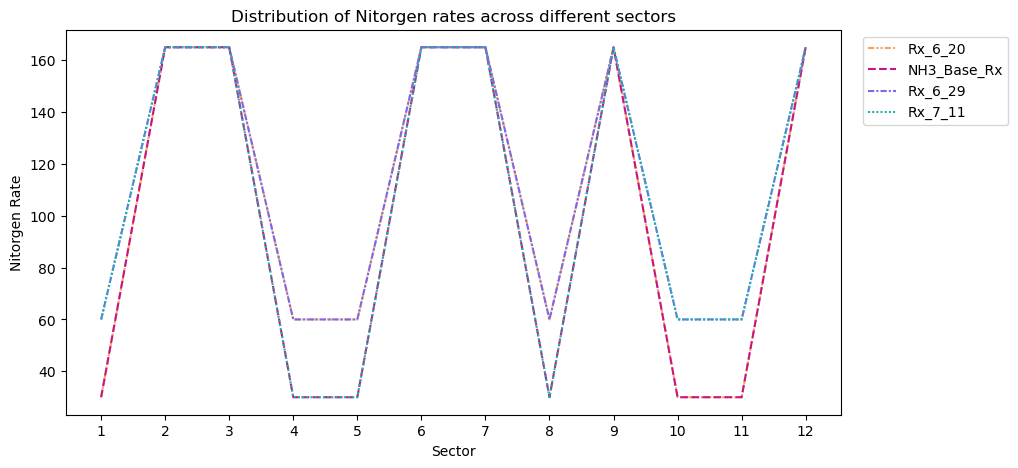

In [115]:
# A line plot for all dates 
plt.figure(figsize = (10, 5))
plt.plot(sectors, CK_data['Rx_6_20'], linestyle = (0, (3, 1, 1, 1, 1, 1)), color = 'sandybrown', label = 'Rx_6_20')
plt.plot(sectors, CK_data['NH3_Base_Rx'], linestyle = 'dashed', color = 'mediumvioletred', label = 'NH3_Base_Rx')
plt.plot(sectors, CK_data['Rx_6_29'], linestyle = (0, (3, 1, 1, 1)), color = 'mediumslateblue', label = 'Rx_6_29')
plt.plot(sectors, CK_data['Rx_7_11'], linestyle =(0, (1, 1)), color = 'lightseagreen', label = 'Rx_7_11')
plt.legend(bbox_to_anchor=(1.225, 1), loc = 1)
plt.xlabel("Sector")
plt.ylabel("Nitorgen Rate")
plt.title("Distribution of Nitorgen rates across different sectors")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_nitrogen_all.png", bbox_inches='tight')

plt.show()

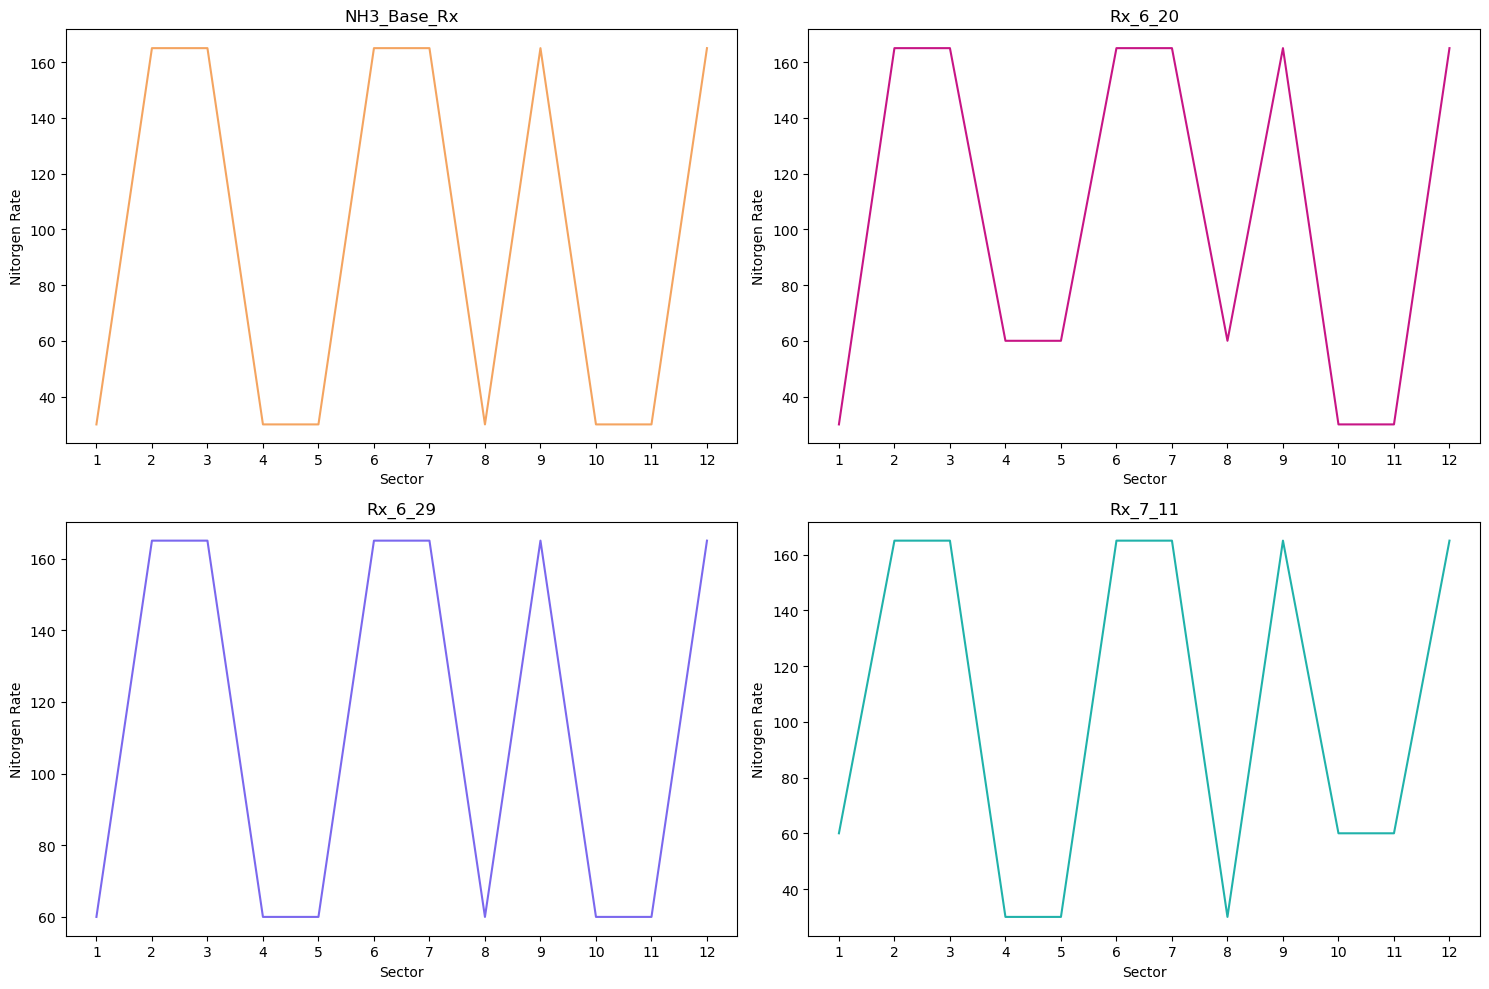

In [116]:
# This plot is too crowded? Maybe create different subplots for different dates?
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(sectors, CK_data['NH3_Base_Rx'], color = 'sandybrown')
axs[0, 0].set_title('NH3_Base_Rx')
axs[0, 1].plot(sectors, CK_data['Rx_6_20'], color = 'mediumvioletred')
axs[0, 1].set_title('Rx_6_20')
axs[1, 0].plot(sectors, CK_data['Rx_6_29'], color = 'mediumslateblue')
axs[1, 0].set_title('Rx_6_29')
axs[1, 1].plot(sectors, CK_data['Rx_7_11'],  color = 'lightseagreen')
axs[1, 1].set_title('Rx_7_11')

for ax in axs.flat:
    ax.set_xticks(sectors)
    ax.set_xlabel('Sector')
    ax.set_ylabel('Nitorgen Rate')
fig.tight_layout()

plt.savefig("figures/Ditribution_of_nitrogen_individual.png")
plt.show()


Plot of SI for different days

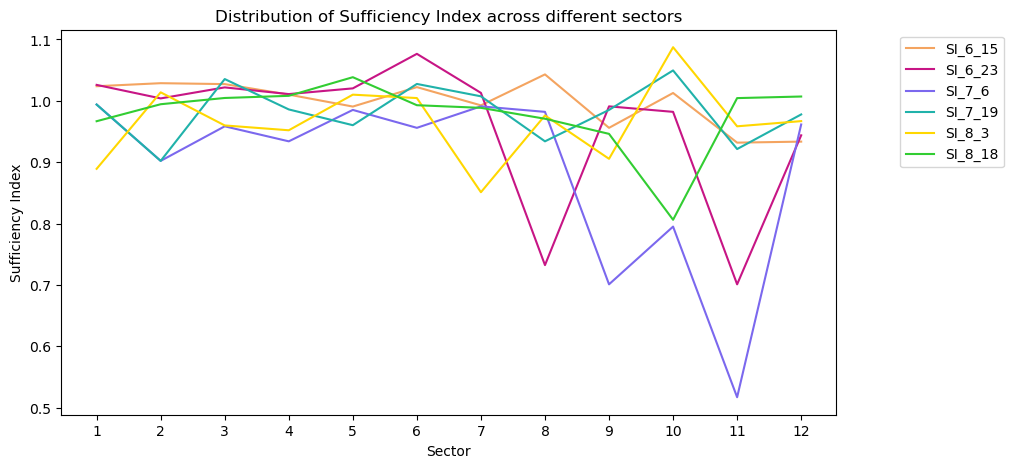

In [119]:
# A line plot for all dates 
plt.figure(figsize = (10, 5))
plt.plot(sectors, CK_data['SI_6_15'], color = 'sandybrown', label = 'SI_6_15')
plt.plot(sectors, CK_data['SI_6_23'], color = 'mediumvioletred', label = 'SI_6_23')
plt.plot(sectors, CK_data['SI_7_6'], color = 'mediumslateblue', label = 'SI_7_6')
plt.plot(sectors, CK_data['SI_7_19'], color = 'lightseagreen', label = 'SI_7_19')
plt.plot(sectors, CK_data['SI_8_3'], color = 'gold', label = 'SI_8_3')
plt.plot(sectors, CK_data['SI_8_18'], color = 'limegreen', label = 'SI_8_18')
plt.legend(bbox_to_anchor=(1.225, 1), loc = 1)
plt.xlabel("Sector")
plt.ylabel("Sufficiency Index")
plt.title("Distribution of Sufficiency Index across different sectors")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_SI_all.png", bbox_inches='tight')

plt.show()

Plot of yield

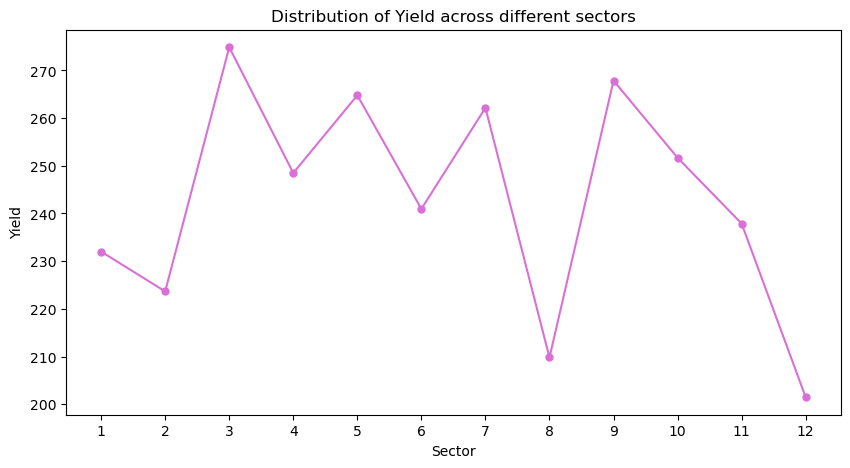

In [132]:
# A line plot for all dates 
plt.figure(figsize = (10, 5))
plt.plot(sectors, CK_data['Yield'], color = 'orchid', marker = 'o',  markersize = 5, label = 'SI_6_15')
plt.xlabel("Sector")
plt.ylabel("Yield")
plt.title("Distribution of Yield across different sectors")
plt.xticks(sectors)


plt.savefig("figures/Ditribution_of_yield.png", bbox_inches='tight')

plt.show()